<a href="https://colab.research.google.com/github/truongnc17/Truong-Nguyen/blob/master/Defaut_payment_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Default payment prediction project 

In this project, I will use dataset ```credit_card_clients.xls``` to train a model for predicting whether a client will default on payment next month or not.

I will try to use **Machine Learning classification algorithms** (KNN, Decision Tree, Random Forest, Support Vector Machines and Logistic Regression) to predict that: *\"Whether or not a client will default payment in the next month ?\"*

Then, we will explore which models is the strongest and find out why ?

## Dataset information

```credit_card_clients.xls``` contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Heaven from April 2005 to September 2005

There are 25 attributes: 

  * ```ID```: ID of each client 
  * ```LIMIT_BAL```: Amount of given credit in NT dollars (New Taiwan dollars) (includes individual and family/supplementary credit
  *```SEX```: Gender (1 = male, 2 = female)
  * ```EDUCATION```: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
  * ```MARRIAGE``` Marital status (1=married, 2=single, 3=others)
  * ```AGE```: Age in years
  * ```PAY_0```,```PAY_1```, ... ,```PAY_6```: Repayment status in September, August, July, June, May, April in 2005 respectively
   
    * -1 = pay duly
    *  1 = payment delay for one month
    *  2 = payment delay for two months

     ...

    *  8 = payment delay for eight months
    *  9 = payment delay for nine months and above
  * ```BILL_AMT1```, ```BILL_AMT2```, ..., ```BILL_AMT6```: Amount of bill statement in September, August, July, ..., April in 2005 respectively (NT dollar)
  * ```PAY_AMT1```, ```PAY_AMT2```, ..., ```PAY_AMT6```: Amount of previous payment in September, August, July, ..., April in 2005 respectively (NT dollar)
  * ```default.payment.next.month```: Default payment (1=yes, 0=no)

  [Back to cell](#scrollTo=TSv2f9uMayGh&line=3&uniqifier=1)

## Main Process

### Step 1: Loading the dataset

It seems that this data has a redundant row (may be this first row is inserted for identifying quickly the number of features and the output feature, but we don't need this row). Furthermore, this dataset has already included index column ```ID```, so I will code like this:

In [ ]:
import pandas as pd
# Read the dataset using pandas
data = pd.read_excel('https://github.com/trangmx/fdc104/blob/main/datasets/credit_card/credit_card_clients.xls?raw=true', header = 1, index_col = 0)

# Show the first 5 rows
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


We should have a general view about this dataset using ```describe()``` method of **pandas**

In [ ]:
pd.set_option('display.max_columns', 30)  
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Step 2: Preprocessing the dataset 

In this step, we will remove duplicate values, handle categorical features and feature scalling

#### Handle missing value

In [ ]:
# Check for total missing value of each feature
data.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

Good, there is no missing value at all !

Then we need to check the domain of each feature to ensure that there is no misunderstanding values with the [dataset description](#scrollTo=mjutYsYcSrvI&line=25&uniqifier=1)

#### Reconstruct the range of values associated with the attributes

In [ ]:
import numpy as np 

for col in data.columns:
  range = data[col].unique()
  range = np.sort(range)
  print(f'{col} ({len(range)} distinct values): {range} \n')

LIMIT_BAL (81 distinct values): [  10000   16000   20000   30000   40000   50000   60000   70000   80000
   90000  100000  110000  120000  130000  140000  150000  160000  170000
  180000  190000  200000  210000  220000  230000  240000  250000  260000
  270000  280000  290000  300000  310000  320000  327680  330000  340000
  350000  360000  370000  380000  390000  400000  410000  420000  430000
  440000  450000  460000  470000  480000  490000  500000  510000  520000
  530000  540000  550000  560000  570000  580000  590000  600000  610000
  620000  630000  640000  650000  660000  670000  680000  690000  700000
  710000  720000  730000  740000  750000  760000  780000  800000 1000000] 

SEX (2 distinct values): [1 2] 

EDUCATION (7 distinct values): [0 1 2 3 4 5 6] 

MARRIAGE (4 distinct values): [0 1 2 3] 

AGE (56 distinct values): [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44
 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68
 69 70 71 72

It can be seen that there is some conflict of feature ```'EDUCATION'```, ```'MARRIAGE'``` and ```'PAY_x'``` with the dataset description. Let's hanle them: 



<b>1. EDUCATION & MARRIAGE</b> 

Let's check the histogram of this feature first

In [ ]:
import matplotlib.pyplot as plt #draw graph

In [ ]:
%matplotlib inline 
#Tells the IPython environment to draw the plots immediately after the current cell.

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

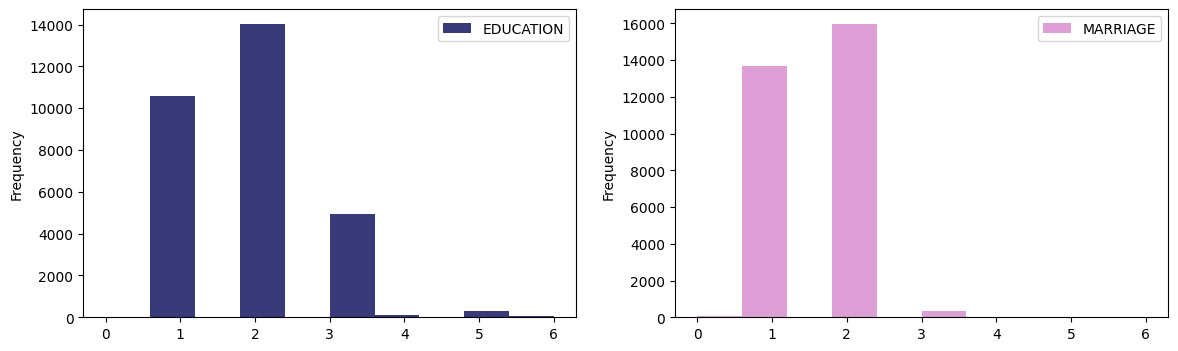

In [ ]:
df = data[['EDUCATION','MARRIAGE']] 

df.plot(kind = 'hist', 
        figsize = (14,4), 
        subplots = True, 
        ylabel = 'Count', 
        colormap = 'tab20b',
        layout=(1, len(df.columns)))

* ```EDUCATION```: 

Since the number of unknown value (0,5,6) is very small, so I will change these values into 4 (others). So the range of values of this feature is: 
```
{ 
    1:'graduate school',
    2:'university',
    3:'high school',
    4:'others'
}
```
* ```MARRIAGE```: 

Since the number of unknown value 0 is very small, so I will change these values into 3 (others). So the range of values of this feature is: 
```
{ 
    1:'married',
    2:'single',
    3:'others'
}
```

In [ ]:
data['EDUCATION'].replace([0,5,6], 4, inplace=True)

In [ ]:
data['MARRIAGE'].replace(0, 3, inplace=True)

<b>2. PAY_0, PAY_2, ... , PAY_6</b> 

Let's check the histogram of these feature first

In [ ]:
# Rename the column PAY_0 into PAY_1 
data.rename(columns = {'PAY_0':'PAY_1'}, inplace = True)

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>]], dtype=object)

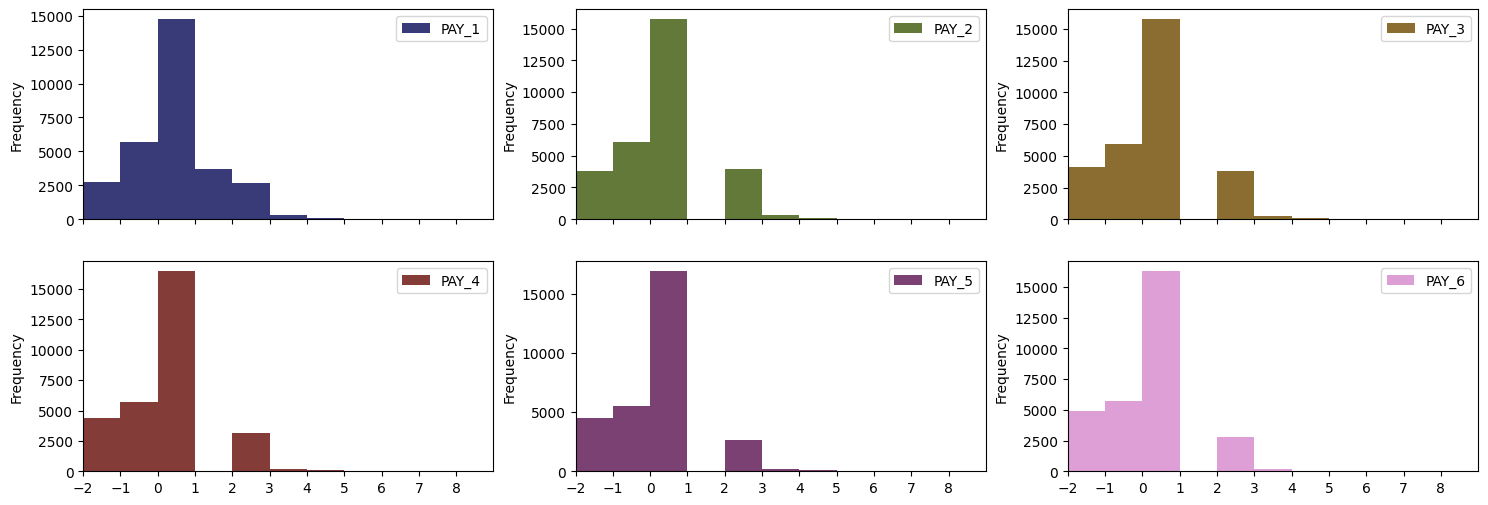

In [ ]:
my_lst = [f"PAY_{i}" for i in np.arange(1,7)]
df_pay = data[my_lst]

df_pay.plot(kind='hist',
            subplots=True,
            figsize = (18,6),
            xlim = (-2,9),
            xticks = np.arange(-2,9),
            ylabel='Count',
            colormap='tab20b',
            layout=(2,3))

From all the histograms above, we can see that in all months, the number of people that pay duly is very high compare to the others. Hence, it is reasonable that the value -2, -1 (pay duly) and 0 will change to 0 (pay duly) 

In [ ]:
# Replace -2,-1 into 0 in all 'PAY_x' attributes
for col in my_lst: 
  data[col].replace([-2,-1,0], 0, inplace=True)

#### Check the format of attribute data

In [ ]:
data.dtypes

LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_1                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

All attributes here are in type ```int64``` so we don't need to convert anymore

#### Data rescalling

I will transform **NT dollar** into **USD** by the ratio: 

 ```1 TWD = 0.033 USD```

In [ ]:
# Rescale BILL and PAY
for i in np.arange(data.columns.get_loc('BILL_AMT1'), data.columns.get_loc('default payment next month')):
  data.iloc[:,i] = data.iloc[:,i] * 0.003 

In [ ]:
# Rescale LIMIT_BAL
data['LIMIT_BAL'] = data['LIMIT_BAL'] * 0.003

#### Data normalizing/standardizing 



In this step, I want to normalize the range of attributes in **USD** unit into **[0,1]**

 To decide using ***normalization*** (change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values) or ***standardization*** (change the values of numeric columns in the dataset to Gaussian distribution), I need to using histogram to check their distribution first: 

In [ ]:
money_lst = [data.columns[i] 
             for i in np.arange(
                 data.columns.get_loc('BILL_AMT1'), 
                 data.columns.get_loc('default payment next month'
                 ))
             ]
print(money_lst)
print(len(money_lst))

['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
12


array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>]], dtype=object)

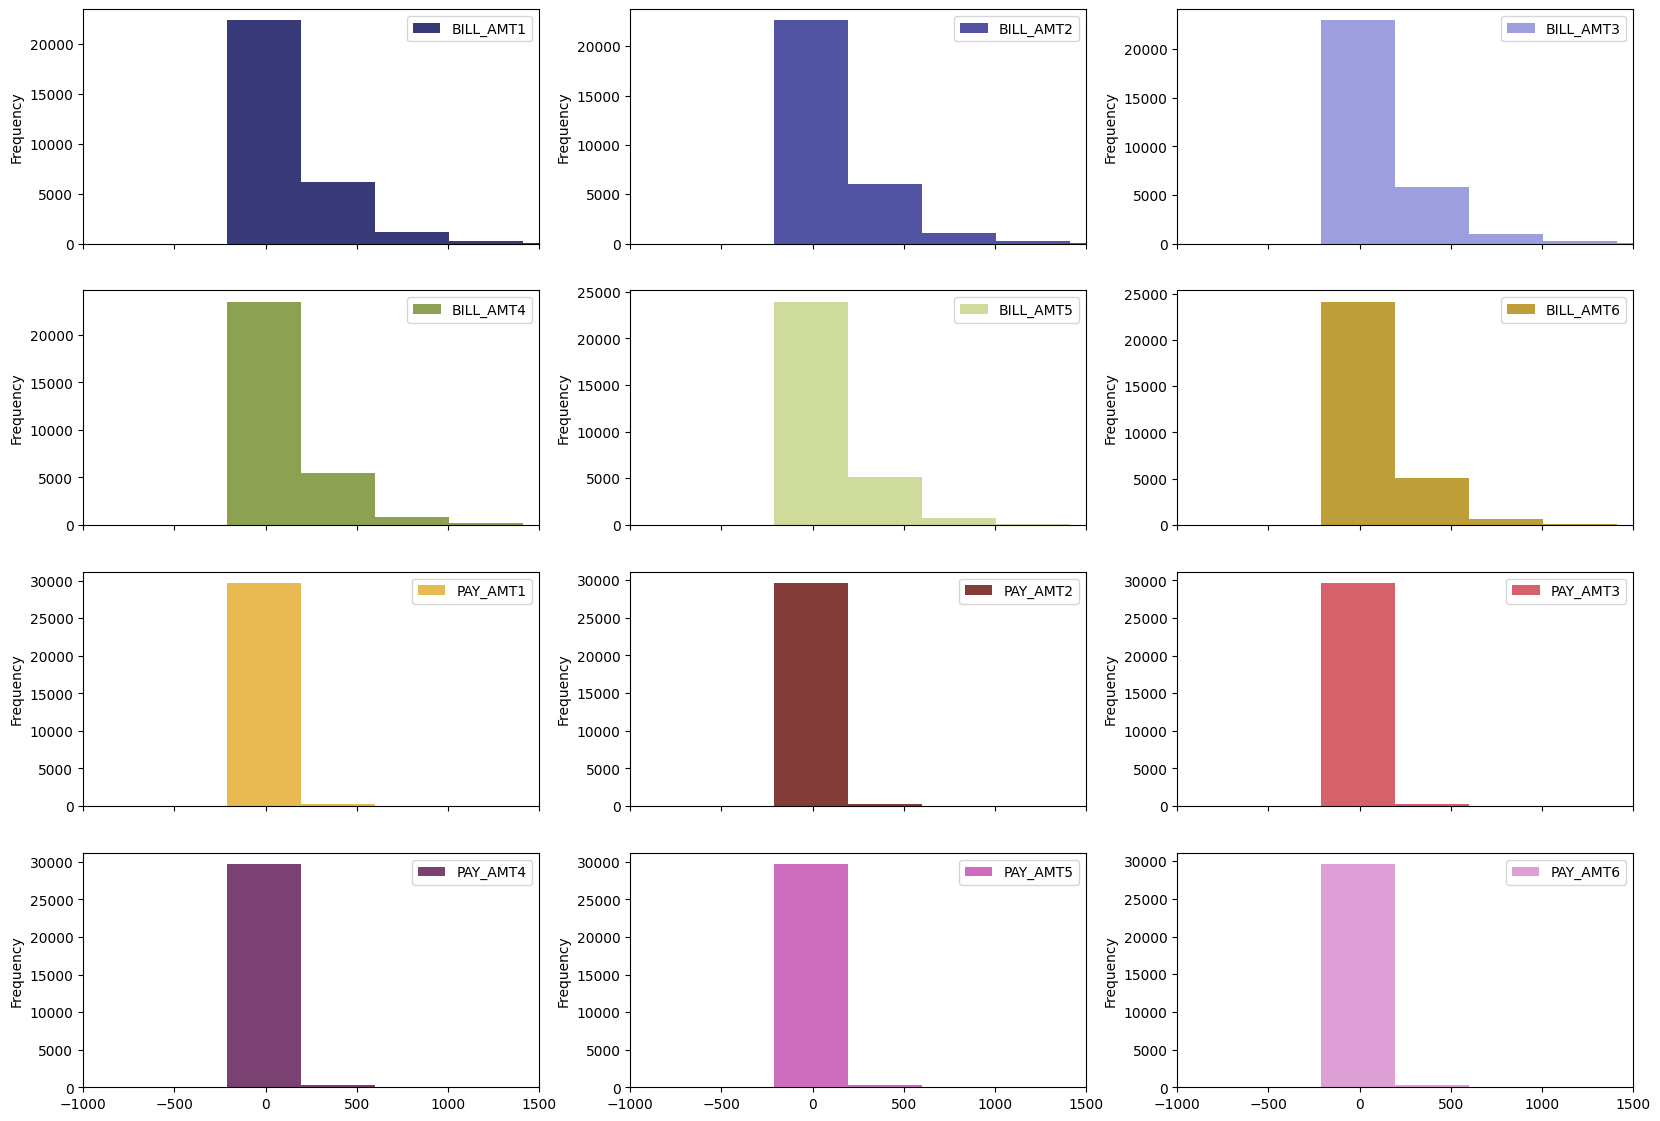

In [ ]:
data[money_lst].plot(kind='hist',
                     subplots=True,
                     figsize=(20,14),
                     layout=(4,3),
                     bins=15,
                     xlim = (-1000,1500),
                     xticks=np.arange(-1000,1501,500),
                     colormap='tab20b',
                     xlabel='Money',
                     ylabel='Frequency'
                     )


array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>]], dtype=object)

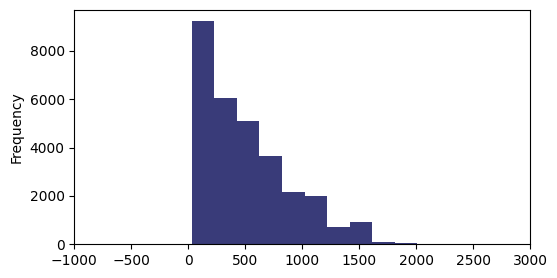

In [ ]:
data['LIMIT_BAL'].plot(kind='hist',
                     subplots=True,
                     figsize=(20,14),
                     layout=(4,3),
                     bins=15,
                     xlim = (-1000,3000),
                     xticks=np.arange(-1000,3001,500),
                     colormap='tab20b',
                     xlabel='Money',
                     ylabel='Frequency'
                     )


All the features above do not have the form bell shape, so I will normalize all the features considered above.

* Formulas for normalizing: 
$$
  x_{new} = \dfrac{x_{old}}{x_{max}}
$$
* Formulas for standardizing: 
$$
  x_{new} = \dfrac{x_{old}-\mu}{\sigma}
$$

In [ ]:
# Normalization
for x in money_lst:
  data[x] = data[x] / data[x].max()

In [ ]:
data['LIMIT_BAL'] = data['LIMIT_BAL'] / data['LIMIT_BAL'].max()

#### Check for duplicates

In [ ]:
print(f'There are {data.duplicated().sum()} duplicated elements')

There are 36 duplicated elements


In [ ]:
data.drop_duplicates(inplace=True)

#### Split the dataset into Training and Test sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop('default payment next month', axis=1)
y = data['default payment next month']

X_train,X_test,y_train,y_test  = train_test_split(X, y, test_size = 0.2, random_state = 40)

### Step 3: Choose the Machine Learning algorithm and Evaluate the performance

In this step, I will try some Machine Learning algorithms and evaluate the performance of each one using some metrics:

* **Accuracy**: The proportion of correctly classified instances (both true positives and true negatives) among all instances in the dataset. It is calculated as `(TP + TN) / (TP + TN + FP + FN)`
* **Precision**: The proportion of true positives among all instances that are predicted as positive. It is calculated as `TP / (TP + FP)`
* **Recall**: The proportion of true positives among all actual positive instances. It is calculated as `TP / (TP + FN)`
* **F1 score**: A weighted harmonic mean of precision and recall, used to balance the trade-off between precision and recall. It is calculated as `2 * (precision * recall) / (precision + recall)`

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score

#### Random Forest Classifier

In [ ]:
# Choose the classifier 
model = RandomForestClassifier(n_estimators=100, random_state = 42)

# Train
%time model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
TP = np.sum(np.logical_and(y_pred == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred == 0, y_test == 1))

print('-----------------------------------------------------')
print(f'accurracy : {accuracy*100:.3f} %')
print(f'True Positives: {TP}')
print(f'False Positive: {FP}')
print(f'True Negative: {TN}')
print(f'False Negative: {FN}')
print(f'Precision: {TP/(TP+FP):.3f}')
print(f'Recall: {TP/(TP+FN):.3f}')
print(f'f1_score : {f1_score(y_test,y_pred):.3f} ')

CPU times: user 8.9 s, sys: 4.58 ms, total: 8.91 s
Wall time: 9.27 s
-----------------------------------------------------
accurracy : 81.812 %
True Positives: 482
False Positive: 267
True Negative: 4421
False Negative: 823
Precision: 0.644
Recall: 0.369
f1_score : 0.469 


#### KNN Classifier

In [ ]:
maxx_accuracy_score = 0
for i in np.arange(1,10):
  # Choose the classifier 
  model = KNeighborsClassifier(n_neighbors = i, algorithm = 'brute', metric = 'euclidean')

  # Train
  %time model.fit(X_train, y_train)

  # Predict
  y_pred = model.predict(X_test)

  # Evaluate
  accuracy = accuracy_score(y_test, y_pred)
  TP = np.sum(np.logical_and(y_pred == 1, y_test == 1))
  TN = np.sum(np.logical_and(y_pred == 0, y_test == 0))
  FP = np.sum(np.logical_and(y_pred == 1, y_test == 0))
  FN = np.sum(np.logical_and(y_pred == 0, y_test == 1))

  print(f'-------------------(n_neighbors = {i})-----------------------')
  print(f'accurracy : {accuracy*100:.3f} %')
  print(f'True Positives: {TP}')
  print(f'False Positive: {FP}')
  print(f'True Negative: {TN}')
  print(f'False Negative: {FN}')
  print(f'Precision: {TP/(TP+FP):.3f}')
  print(f'Recall: {TP/(TP+FN):.3f}')
  print(f'f1_score : {f1_score(y_test,y_pred):.3f} ')
  print('--------------------------------------------------------------')

  maxx_accuracy_score = max(maxx_accuracy_score, accuracy)

print(f'The maximum accurracy of prediction when using KNN Classifier is : {maxx_accuracy_score*100:.2f} %')

CPU times: user 11 ms, sys: 0 ns, total: 11 ms
Wall time: 12.5 ms
-------------------(n_neighbors = 1)-----------------------
accurracy : 72.418 %
True Positives: 493
False Positive: 841
True Negative: 3847
False Negative: 812
Precision: 0.370
Recall: 0.378
f1_score : 0.374 
--------------------------------------------------------------
CPU times: user 10.3 ms, sys: 0 ns, total: 10.3 ms
Wall time: 10.2 ms
-------------------(n_neighbors = 2)-----------------------
accurracy : 78.875 %
True Positives: 257
False Positive: 218
True Negative: 4470
False Negative: 1048
Precision: 0.541
Recall: 0.197
f1_score : 0.289 
--------------------------------------------------------------
CPU times: user 11.1 ms, sys: 0 ns, total: 11.1 ms
Wall time: 12.6 ms
-------------------(n_neighbors = 3)-----------------------
accurracy : 77.991 %
True Positives: 463
False Positive: 477
True Negative: 4211
False Negative: 842
Precision: 0.493
Recall: 0.355
f1_score : 0.412 
-------------------------------------

#### Decision Tree

In [ ]:
# Choose the classifier 
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 50)

# Train
%time model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
TP = np.sum(np.logical_and(y_pred == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred == 0, y_test == 1))

print('-----------------------------------------------------')
print(f'accurracy : {accuracy*100:.3f} %')
print(f'True Positives: {TP}')
print(f'False Positive: {FP}')
print(f'True Negative: {TN}')
print(f'False Negative: {FN}')
print(f'Precision: {TP/(TP+FP):.3f}')
print(f'Recall: {TP/(TP+FN):.3f}')
print(f'f1_score : {f1_score(y_test,y_pred):.3f} ')

CPU times: user 1.12 s, sys: 4.84 ms, total: 1.13 s
Wall time: 1.39 s
-----------------------------------------------------
accurracy : 72.601 %
True Positives: 515
False Positive: 852
True Negative: 3836
False Negative: 790
Precision: 0.377
Recall: 0.395
f1_score : 0.385 


#### Support Vector Machine 

In [ ]:
# Choose the classifier 
model = SVC()

# Train
%time model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
TP = np.sum(np.logical_and(y_pred == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred == 0, y_test == 1))

print('-----------------------------------------------------')
print(f'accurracy : {accuracy*100:.3f} %')
print(f'True Positives: {TP}')
print(f'False Positive: {FP}')
print(f'True Negative: {TN}')
print(f'False Negative: {FN}')
print(f'Precision: {TP/(TP+FP):.3f}')
print(f'Recall: {TP/(TP+FN):.3f}')
print(f'f1_score : {f1_score(y_test,y_pred):.3f} ')

CPU times: user 21.8 s, sys: 93.2 ms, total: 21.9 s
Wall time: 22.8 s
-----------------------------------------------------
accurracy : 79.877 %
True Positives: 444
False Positive: 345
True Negative: 4343
False Negative: 861
Precision: 0.563
Recall: 0.340
f1_score : 0.424 


## Conclusion

I have some conclusions after finishing this project: 

* **Preprocessing the data** is really important. The performance of the predictive model depends heavily on the quality of the pre-processed data. So it's recommended to process the data thoroughly, step by step
* Among these model, **Random Forest Classifier** performs relatively good with the highest accuracy: 81,81 %. Although the other metrics are not so good like precision, recall or F1 score but I think that, the main reason is about the original dataset itself.